In [34]:
import pandas as pd
import urllib.parse
import collections
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('/content/skills_data.csv')

In [36]:
df.head()

,username,job_titles,skills
0,%D0%BC%CE%B1%CE%B7%D7%A0%CF%85%CE%B7%CE%B1%D1%...,"[sr. sre,senior site reliability engineer,impl...","[data center architecture,vendor management,wi..."
1,%E0%B2%A8%E0%B2%B5%E0%B3%80%E0%B2%A8%E0%B3%8D-...,"[management trainee human resources,technical ...","[human resources,technical recruiting,strategi..."
2,%E0%B2%AE%E0%B2%82%E0%B2%9C%E0%B3%81%E0%B2%A8%...,[deputy manager - hr],"[human resources (hr),hr policies,human resour..."
3,%E2%97%8F%E0%B9%8B-%C2%A2%D0%BD%D1%94%D1%82%CE...,"[sales manager,area manager,universal banker]","[banking,loans,retail banking,sales operations..."
4,%E2%98%80%EF%B8%8Frohit-kumar-sharma-a1672a94,"[software development engineer ,intern,intern,...","[mvc architecture,php,algorithms,software desi..."


In [37]:
#Cleaning
def decode_unicode(text):
    return urllib.parse.unquote(text)

df.rename(columns={'job_titles': 'job_title'}, inplace=True)

df['username'] = df['username'].apply(decode_unicode)
df['job_title'] = df['job_title'].apply(decode_unicode)
df['skills'] = df['skills'].apply(decode_unicode)

In [38]:
df.head(5)

,username,job_title,skills
0,мαηנυηαтh-n-g,"[sr. sre,senior site reliability engineer,impl...","[data center architecture,vendor management,wi..."
1,ನವೀನ್-ನಾಯ್ಕ್-ಎಸ್-6b8265135,"[management trainee human resources,technical ...","[human resources,technical recruiting,strategi..."
2,ಮಂಜುನಾಥ-ಪೂಜಾರಿ-manjunatha-poojary✅-639105145,[deputy manager - hr],"[human resources (hr),hr policies,human resour..."
3,●๋-¢нєтαη-¢нσυgυℓє●๋-094b0448,"[sales manager,area manager,universal banker]","[banking,loans,retail banking,sales operations..."
4,☀️rohit-kumar-sharma-a1672a94,"[software development engineer ,intern,intern,...","[mvc architecture,php,algorithms,software desi..."


In [39]:
#Q1)What are the most popular skills required for the role of a software developer/software engineer?

def extract_popular_skills(df, num_skills=10):
    all_skills = []
    for skills in df['skills'].dropna():
        all_skills.extend(skills.split(','))

    skill_counter = collections.Counter(all_skills)
    popular_skills = skill_counter.most_common(num_skills)

    return popular_skills

num_skills_to_extract = 10
popular_skills = extract_popular_skills(df, num_skills_to_extract)

print("Most popular skills for software developers|software engineer:")
for skill, count in popular_skills:
    print(f"{skill}: {count} occurrences")

Most popular skills for software developers|software engineer:
microsoft excel: 326 occurrences
leadership: 290 occurrences
management: 277 occurrences
sql: 245 occurrences
microsoft office: 241 occurrences
team management: 228 occurrences
c++: 225 occurrences
java: 212 occurrences
microsoft word: 193 occurrences
c: 169 occurrences


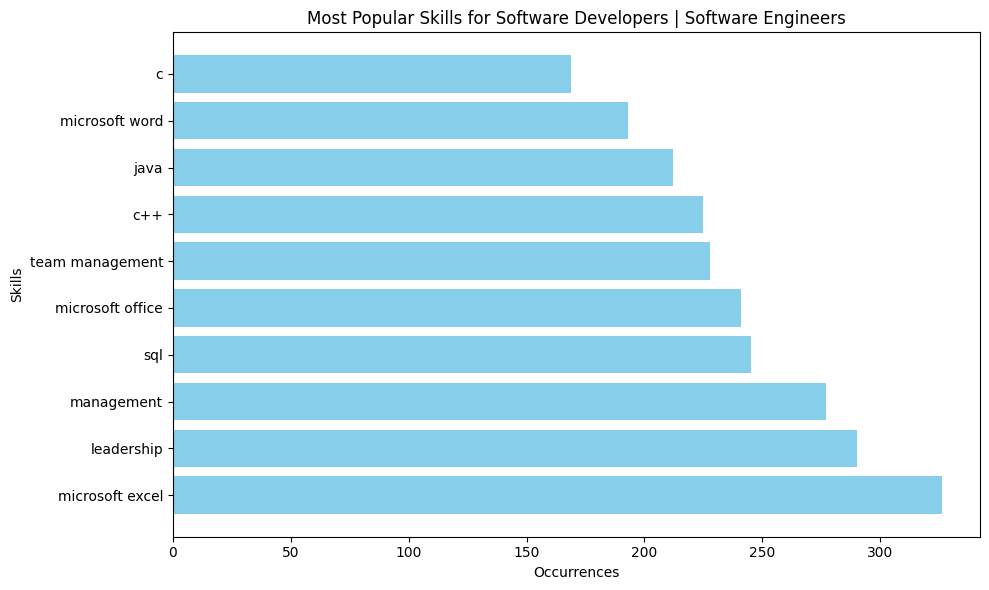

In [40]:
#Graph
skills, counts = zip(*popular_skills)

plt.figure(figsize=(10, 6))
plt.barh(skills, counts, color='skyblue')
plt.xlabel('Occurrences')
plt.ylabel('Skills')
plt.title('Most Popular Skills for Software Developers | Software Engineers')
plt.tight_layout()
plt.show()

In [41]:
#Q2)Which job title requires ‘Python’ as the highly sought after skill?

df.rename(columns={'job_titles': 'job_title'}, inplace=True)

python_job_titles = df[df['skills'].str.contains('Python', case=False)]['job_title'].drop_duplicates().tolist()

print("Job title that requires 'Python' as a highly sought-after skill (without repeating job titles):")
print(python_job_titles)

Job title that requires 'Python' as a highly sought-after skill (without repeating job titles):
['[sr. sre,senior site reliability engineer,implementation and off site engineer,sre,sr. engineer - production operation,team lead - it]', '[devops ii,devops ,devops engineer]', '[data analyst,freelance writer,analytics intern]', '[senior manager,engineering leader,founder,senior project lead,associate software engineer,senior technical program manager]', '[digital marketing intern,business analyst - monetisation,system engineer,assistant manager]', '[engineer 2,software engineering trainee,sde ii,summer intern,software engineer]', '[student,lead backend engineer,sde iv,engineering lead,intern,software engineer,software developer,co-founder]', '[software engineer i a,r&d internship,sr tech associate,senior software engineer]', '[software engineer intern,head of public relations,public relations executive,sde1]', '[geographic information systems engineer,freelance,data science intern,data ana

In [42]:
#Q3)What are other most popular skills for a professional who knows ‘react.js’

df.rename(columns={'job_titles': 'job_title'}, inplace=True)
react_professionals = df[df['skills'].str.contains('react.js', case=False)]
all_skills = react_professionals['skills'].str.split(',').explode()
skills_count = all_skills.value_counts()
other_popular_skills = skills_count.drop(index='react.js')

print("Top 10 most popular skills for professionals who know 'react.js':")
print(other_popular_skills.head(10))

Top 10 most popular skills for professionals who know 'react.js':
javascript                      41
html                            33
cascading style sheets (css)    31
c++                             30
git                             29
node.js                         27
mongodb                         27
java                            26
sql                             25
mysql                           24
Name: skills, dtype: int64


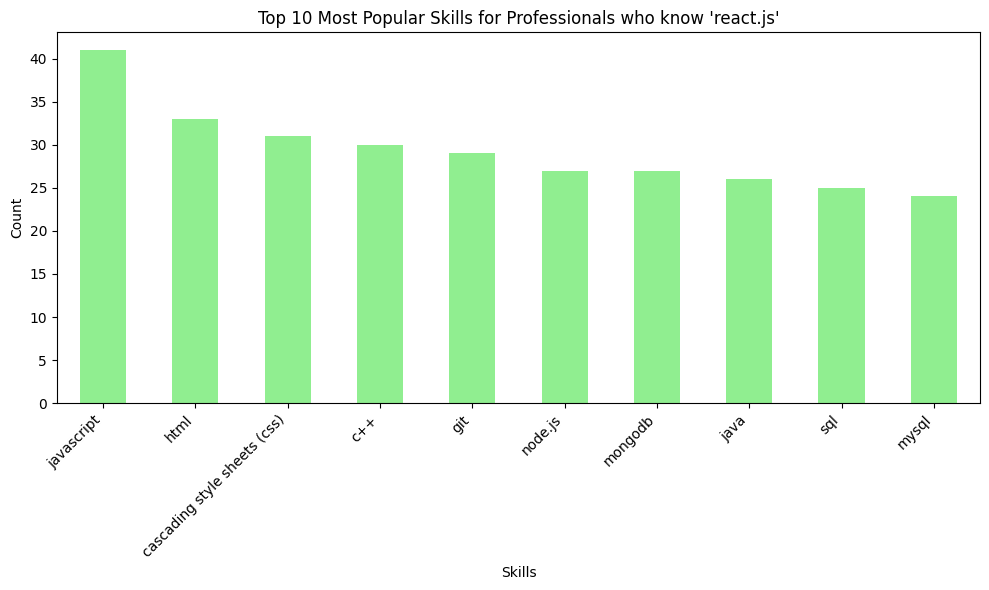

In [43]:
#Graph
plt.figure(figsize=(10, 6))
other_popular_skills.head(10).plot(kind='bar', color='lightgreen')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.title("Top 10 Most Popular Skills for Professionals who know 'react.js'")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [44]:
#Q4)Can you find some more interesting observations from this dataset?
 #I have found most demand job titles
Most_in_demand_job_titles = df['job_title'].value_counts().head(5)
print("Most in-demand job titles:")
print(most_in_demand_job_titles)


Most in-demand job titles:
[software engineer]                               5
[software engineer,software engineer]             4
[software engineer,senior software engineer]      2
[engineer,software engineer,software engineer]    2
[manager]                                         2
Name: job_title, dtype: int64


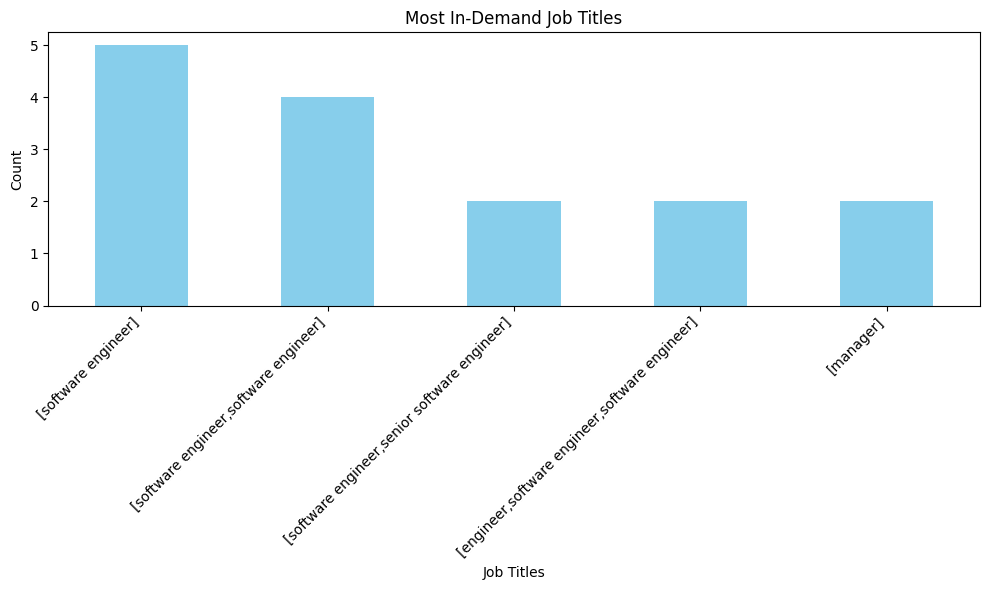

In [45]:
#graph
most_in_demand_job_titles = df['job_title'].value_counts().head(5)

plt.figure(figsize=(10, 6))
most_in_demand_job_titles.plot(kind='bar', color='skyblue')
plt.xlabel('Job Titles')
plt.ylabel('Count')
plt.title('Most In-Demand Job Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()